In [79]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [80]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Reading rounds2 data
uber = pd.read_csv("C:/Users/Aditya/Documents/Assignment/Uber analysis/Uber Request Data.csv")

In [82]:
#Checking info on uber dataset
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [83]:
#To know no.of rows & columns in a dataframe
uber.shape

(6745, 6)

In [84]:
#Verifying head of dataframe
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [85]:
#Converting 'Request timestamp' & 'Drop timestamp' columns to date time format
uber['Request timestamp']= pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Drop timestamp']= pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

In [86]:
#Checking info on uber dataset after conversion
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [87]:
#Finding column wise null percentage
round(100*(uber.isnull().sum(axis=0)/len(uber.index)),2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [88]:
#Verifying the rows with null values
ubernull = uber[uber.isnull().any(axis=1)]
ubernull.head()
ubernull.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT


In [89]:
#With above ubernull dataset it is evident that null values in 'Drop timestamp' and 'Driver id' columns ae displayed in NA only when cab is cancelled or No cab available
#Hence there is no need to handle the missing values in this case

In [90]:
#Splitting date time column into date and time
uber['Request_Datestamp']= uber['Request timestamp'].apply(lambda x:x.date())
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Datestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11


In [91]:
#Checking info on uber dataset
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request_Datestamp    6745 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 368.9+ KB


In [92]:
#Converting 'Request timestamp' & 'Drop timestamp' columns to date time format
uber['Request_Datestamp'] = pd.to_datetime(uber['Request_Datestamp'], errors= 'coerce')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], errors= 'coerce')
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Datestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13


In [97]:
#Splitting date column into month & year
#uber['Request_Month']= uber.Request_Datestamp.dt.month
#uber['Request_Year']= uber.Request_Datestamp.dt.year
#uber.head(10)

In [98]:
#Creating day column 'Request_Day'
uber['Request_Day'] = uber['Request_Datestamp'].dt.day_name()
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Datestamp,Request_Day,Request_Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday,8


In [99]:
#Creating hours column 'Request_Hour' 
uber['Request_Hour']= pd.to_datetime(uber['Request timestamp']).dt.hour
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Datestamp,Request_Day,Request_Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday,8


In [100]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request_Datestamp    6745 non-null datetime64[ns]
Request_Day          6745 non-null object
Request_Hour         6745 non-null int64
dtypes: datetime64[ns](3), float64(1), int64(2), object(3)
memory usage: 474.3+ KB


In [101]:
#Creating new column 'Journey_time' from airport to city or city to airport
uber['Journey_time(mins)'] = uber['Drop timestamp'] - uber['Request timestamp']
uber['Journey_time(mins)'] = (uber['Journey_time(mins)']/np.timedelta64(1,'m')).abs()  
#Rounding 'Journey_time(mins)' column
uber['Journey_time(mins)'] = uber['Journey_time(mins)'].apply(lambda x:round(x,0))
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Datestamp,Request_Day,Request_Hour,Journey_time(mins)
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,Monday,11,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,Monday,17,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,Tuesday,9,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,Tuesday,21,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday,8,53.0


In [102]:
#Checking info on uber dataset after creating new column
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id            6745 non-null int64
Pickup point          6745 non-null object
Driver id             4095 non-null float64
Status                6745 non-null object
Request timestamp     6745 non-null datetime64[ns]
Drop timestamp        2831 non-null datetime64[ns]
Request_Datestamp     6745 non-null datetime64[ns]
Request_Day           6745 non-null object
Request_Hour          6745 non-null int64
Journey_time(mins)    2831 non-null float64
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 527.0+ KB


In [103]:
#Creating 'Time_slot' column based on 'Request timestamp'
bins = [0,4,11,15,20,24]
labels = ['Night','Morning','Afternoon','Evening','Late evening']
hours = uber['Request timestamp'].dt.hour
uber['Time_slot'] = pd.cut(hours,bins=bins,labels=labels)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Datestamp,Request_Day,Request_Hour,Journey_time(mins),Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,Monday,11,69.0,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,Monday,17,50.0,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,Tuesday,9,41.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,Tuesday,21,55.0,Late evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday,8,53.0,Morning


Text(0.5, 1.0, 'Density of Request hour')

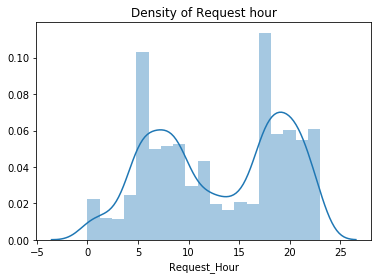

In [104]:
#Univariate distribution(Density plot) for 'Request_Hour'. This is plotted to know in which hours most number of requests are done.
#From the below plot it is evident that most no.of requests are coming at 5am and 6pm.
sns.distplot(uber['Request_Hour'])
plt.title('Density of Request hour')

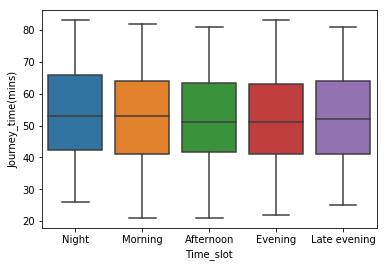

In [105]:
##Visualizing the time taken for travel in different time slots
#Create a new data frame with values of status = 'Trip Completed'
completed = uber.loc[uber['Status'] == 'Trip Completed']
sns.boxplot(x='Time_slot', y= 'Journey_time(mins)', data=completed)
#From the below plot it is evident that journey time is higher during nights

In [106]:
#Segmented analysis on categorical variables
segment_analysis = uber.groupby(['Pickup point','Status', 'Time_slot'])
segment_analysis['Time_slot'].count()

Pickup point  Status             Time_slot   
Airport       Cancelled          Night              2
                                 Morning           37
                                 Afternoon         36
                                 Evening           92
                                 Late evening      31
              No Cars Available  Night            118
                                 Morning           44
                                 Afternoon         55
                                 Evening         1076
                                 Late evening     390
              Trip Completed     Night             80
                                 Morning          484
                                 Afternoon        187
                                 Evening          350
                                 Late evening     203
City          Cancelled          Night             60
                                 Morning          883
                                 Aft

In [107]:
#Creating a new dataframe with requests that get cancelled or show 'no cars available'
uber_prob = uber.loc[uber['Status'] != 'Trip Completed']
uber_prob

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Datestamp,Request_Day,Request_Hour,Journey_time(mins),Time_slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,Wednesday,6,NaN,Morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,Thursday,17,NaN,Evening
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,Thursday,20,NaN,Evening
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,Friday,10,NaN,Morning
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,Tuesday,19,NaN,Evening
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT,2016-07-13,Wednesday,20,NaN,Evening
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,2016-07-14,Thursday,8,NaN,Morning
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT,2016-07-14,Thursday,19,NaN,Evening
2839,80,City,3.0,Cancelled,2016-07-11 04:47:00,NaT,2016-07-11,Monday,4,NaN,Night
2840,534,City,3.0,Cancelled,2016-07-11 10:01:00,NaT,2016-07-11,Monday,10,NaN,Morning


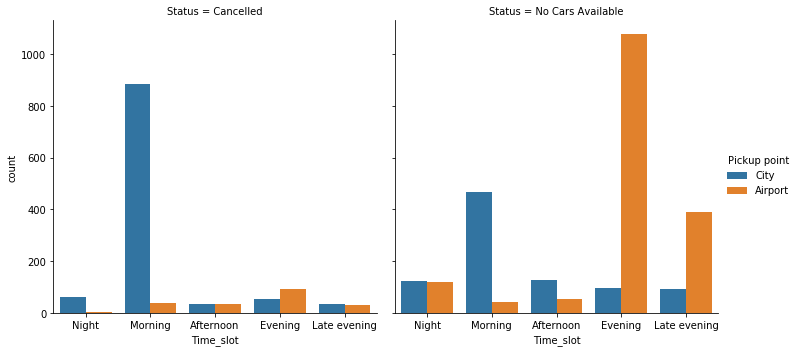

In [108]:
#Frequency of requests that get cancelled or show 'no cars available'
sns.catplot(x='Time_slot', kind= 'count', col='Status', hue= 'Pickup point', data=uber_prob)
#From the below plot it is evident that Cancellations are too high in city during mornings 
#Also No cars availble is high in airports during evenings and late evenings

In [109]:
#Creating a dataframe with Demand column which is 
demand = uber.groupby(['Time_slot', 'Pickup point'])
demand = demand['Time_slot'].count().reset_index(name='Demand')
demand

,Time_slot,Pickup point,Demand
0,Night,Airport,200
1,Night,City,279
2,Morning,Airport,565
3,Morning,City,1952
4,Afternoon,Airport,278
5,Afternoon,City,373
6,Evening,Airport,1518
7,Evening,City,534
8,Late evening,Airport,624
9,Late evening,City,323


In [110]:
#Creating a dataframe with supply column 
supply = uber.loc[uber['Status'] == 'Trip Completed']
supply = supply.groupby(['Time_slot', 'Pickup point'])
supply = supply['Time_slot'].count().reset_index(name='Supply')
supply

,Time_slot,Pickup point,Supply
0,Night,Airport,80
1,Night,City,94
2,Morning,Airport,484
3,Morning,City,601
4,Afternoon,Airport,187
5,Afternoon,City,213
6,Evening,Airport,350
7,Evening,City,383
8,Late evening,Airport,203
9,Late evening,City,196


In [111]:
#Joining 2 datasets demand & supply into one as'demand_supply'
demand_supply = demand.merge(supply, how = 'left', on=['Time_slot','Pickup point'])
demand_supply['Gap'] = demand_supply['Demand']- demand_supply['Supply']
demand_supply

,Time_slot,Pickup point,Demand,Supply,Gap
0,Night,Airport,200,80,120
1,Night,City,279,94,185
2,Morning,Airport,565,484,81
3,Morning,City,1952,601,1351
4,Afternoon,Airport,278,187,91
5,Afternoon,City,373,213,160
6,Evening,Airport,1518,350,1168
7,Evening,City,534,383,151
8,Late evening,Airport,624,203,421
9,Late evening,City,323,196,127


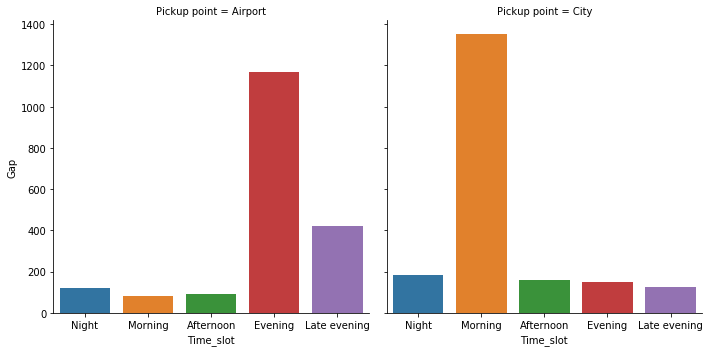

In [112]:
#Visualizing gap for eah time slot
sns.catplot(x='Time_slot', y= 'Gap', col= 'Pickup point', data=demand_supply, kind = 'bar')

In [113]:
#Using melt function to unpivot 'Demand' & 'Supply' columns to row axis
demand_supply = pd.melt(demand_supply, id_vars=['Time_slot','Pickup point'], value_vars=['Demand', 'Supply'],
                         var_name='Demand/Supply', value_name='Count')
demand_supply

,Time_slot,Pickup point,Demand/Supply,Count
0,Night,Airport,Demand,200
1,Night,City,Demand,279
2,Morning,Airport,Demand,565
3,Morning,City,Demand,1952
4,Afternoon,Airport,Demand,278
5,Afternoon,City,Demand,373
6,Evening,Airport,Demand,1518
7,Evening,City,Demand,534
8,Late evening,Airport,Demand,624
9,Late evening,City,Demand,323


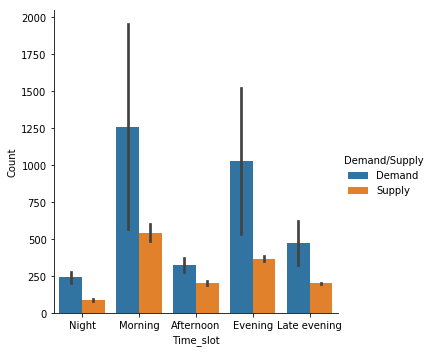

In [114]:
#Visualizing Demand vs supply for eah time slot
sns.catplot(x='Time_slot', y= 'Count', hue= 'Demand/Supply', data=demand_supply, kind = 'bar')

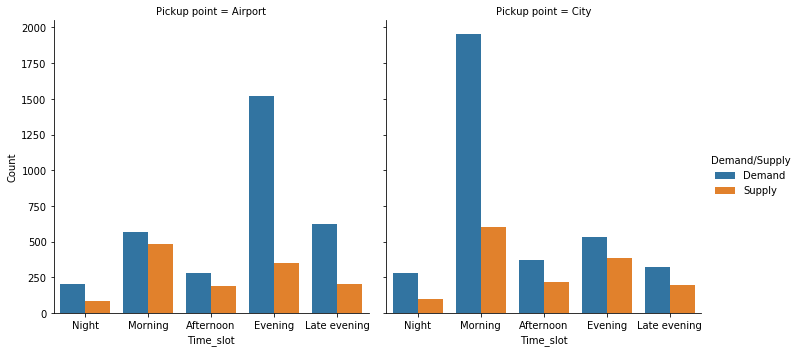

In [115]:
#Visualizing Demand vs supply for eah time slot according to pickup point
sns.catplot(x='Time_slot', y= 'Count', col='Pickup point', hue= 'Demand/Supply', data=demand_supply, kind = 'bar')

In [116]:
###Below are the observations from above demand vs supply plots
#1. Highest gap exists in Morning, Afternoon & Evening time slots
#2. During morning gap is high in city whereas, it is high in airport during Aftenoon & Evening